## 4. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

## MAST part

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the NetCDF file using xarray library and afterwards, convert to pandas df
#Loading the mast data
import xarray as xr
ds = xr.open_dataset('risoe_m_all.nc')
df = ds.to_dataframe()
df = df.reset_index()
df.head(2)
df.shape

(628359, 27)

We will use describe to see what columns we have and what is the distribution of their values, to get a feel of our data.

In [3]:
df.describe()

,time,ws44,ws44_qc,ws77,ws77_qc,ws125,ws125_qc,wd77,wd77_qc,wd125,...,td01,td01_qc,rain,rain_qc,press,press_qc,rhum,rhum_qc,grad,grad_qc
count,628359,480818.000000,480818.0,621607.000000,621607.0,541705.000000,541705.0,627811.000000,627811.0,558830.000000,...,604435.000000,604435.0,628353.000000,628353.0,363457.000000,363457.0,365546.000000,365546.0,309395.000000,309395.0
mean,2001-12-02 09:56:52.848037248,5.719429,0.0,6.882234,0.0,7.647368,0.0,193.137086,0.0,186.456887,...,7.609410,0.0,42.327872,0.0,853.998449,0.0,67.082379,0.0,28.943015,0.0
min,1995-11-20 16:25:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,-4.340000,0.0,0.000000,0.0,-4.300000,0.0,-1.000000,0.0,-5.000000,0.0
25%,1998-11-15 14:30:00,3.350000,0.0,4.550000,0.0,5.110000,0.0,119.000000,0.0,125.000000,...,-0.680000,0.0,0.000000,0.0,999.100000,0.0,62.000000,0.0,0.000000,0.0
50%,2001-11-10 13:55:00,5.490000,0.0,6.630000,0.0,7.530000,0.0,209.000000,0.0,191.000000,...,-0.470000,0.0,0.000000,0.0,1011.300000,0.0,79.000000,0.0,1.000000,0.0
75%,2004-12-29 06:58:00,7.720000,0.0,8.830000,0.0,9.950000,0.0,274.000000,0.0,260.000000,...,0.000000,0.0,0.000000,0.0,1018.900000,0.0,90.000000,0.0,15.000000,0.0
max,2007-12-31 23:56:00,30.910000,0.0,32.170000,0.0,34.300000,0.0,360.000000,0.0,360.000000,...,987.000000,0.0,1723.000000,0.0,1043.700000,0.0,100.000000,0.0,998.900000,0.0
std,NaN,3.338809,0.0,3.297613,0.0,3.600278,0.0,98.183961,0.0,94.825163,...,24.671792,0.0,229.492640,0.0,368.407902,0.0,31.714690,0.0,130.448397,0.0


Looking at the description above, the data available in the dataset is:
- Wind speeds and directions for different alttiudes (44, 77 and 125 meters)
- Temperature at different altitudes (3, 44, and 118 meters)
- Dew Point Temperature at 1 meter altitude
- Rainfall
- Atmospheric Pressure
- Relative Humidity
- Wind Gradient

Additional observations:

- The wind speed ranges from 0 to 34 m/s.
- The data seems to span from late 1995 to late 2007.
- The columns ending with "qc" seem to contain no information, only zero values.

In [4]:
# Let's drop the columns ending in _qc since they don't bring much to the table.

df.columns.values
qc_columns = [col for col in df.columns if col.endswith('_qc')]
df_mast = df.drop(columns=qc_columns)
df_mast.columns

Index(['time', 'ws44', 'ws77', 'ws125', 'wd77', 'wd125', 't003', 't044',
       't118', 'td01', 'rain', 'press', 'rhum', 'grad'],
      dtype='object')

Let's now look at the correlation between our columns, out of curiosity.

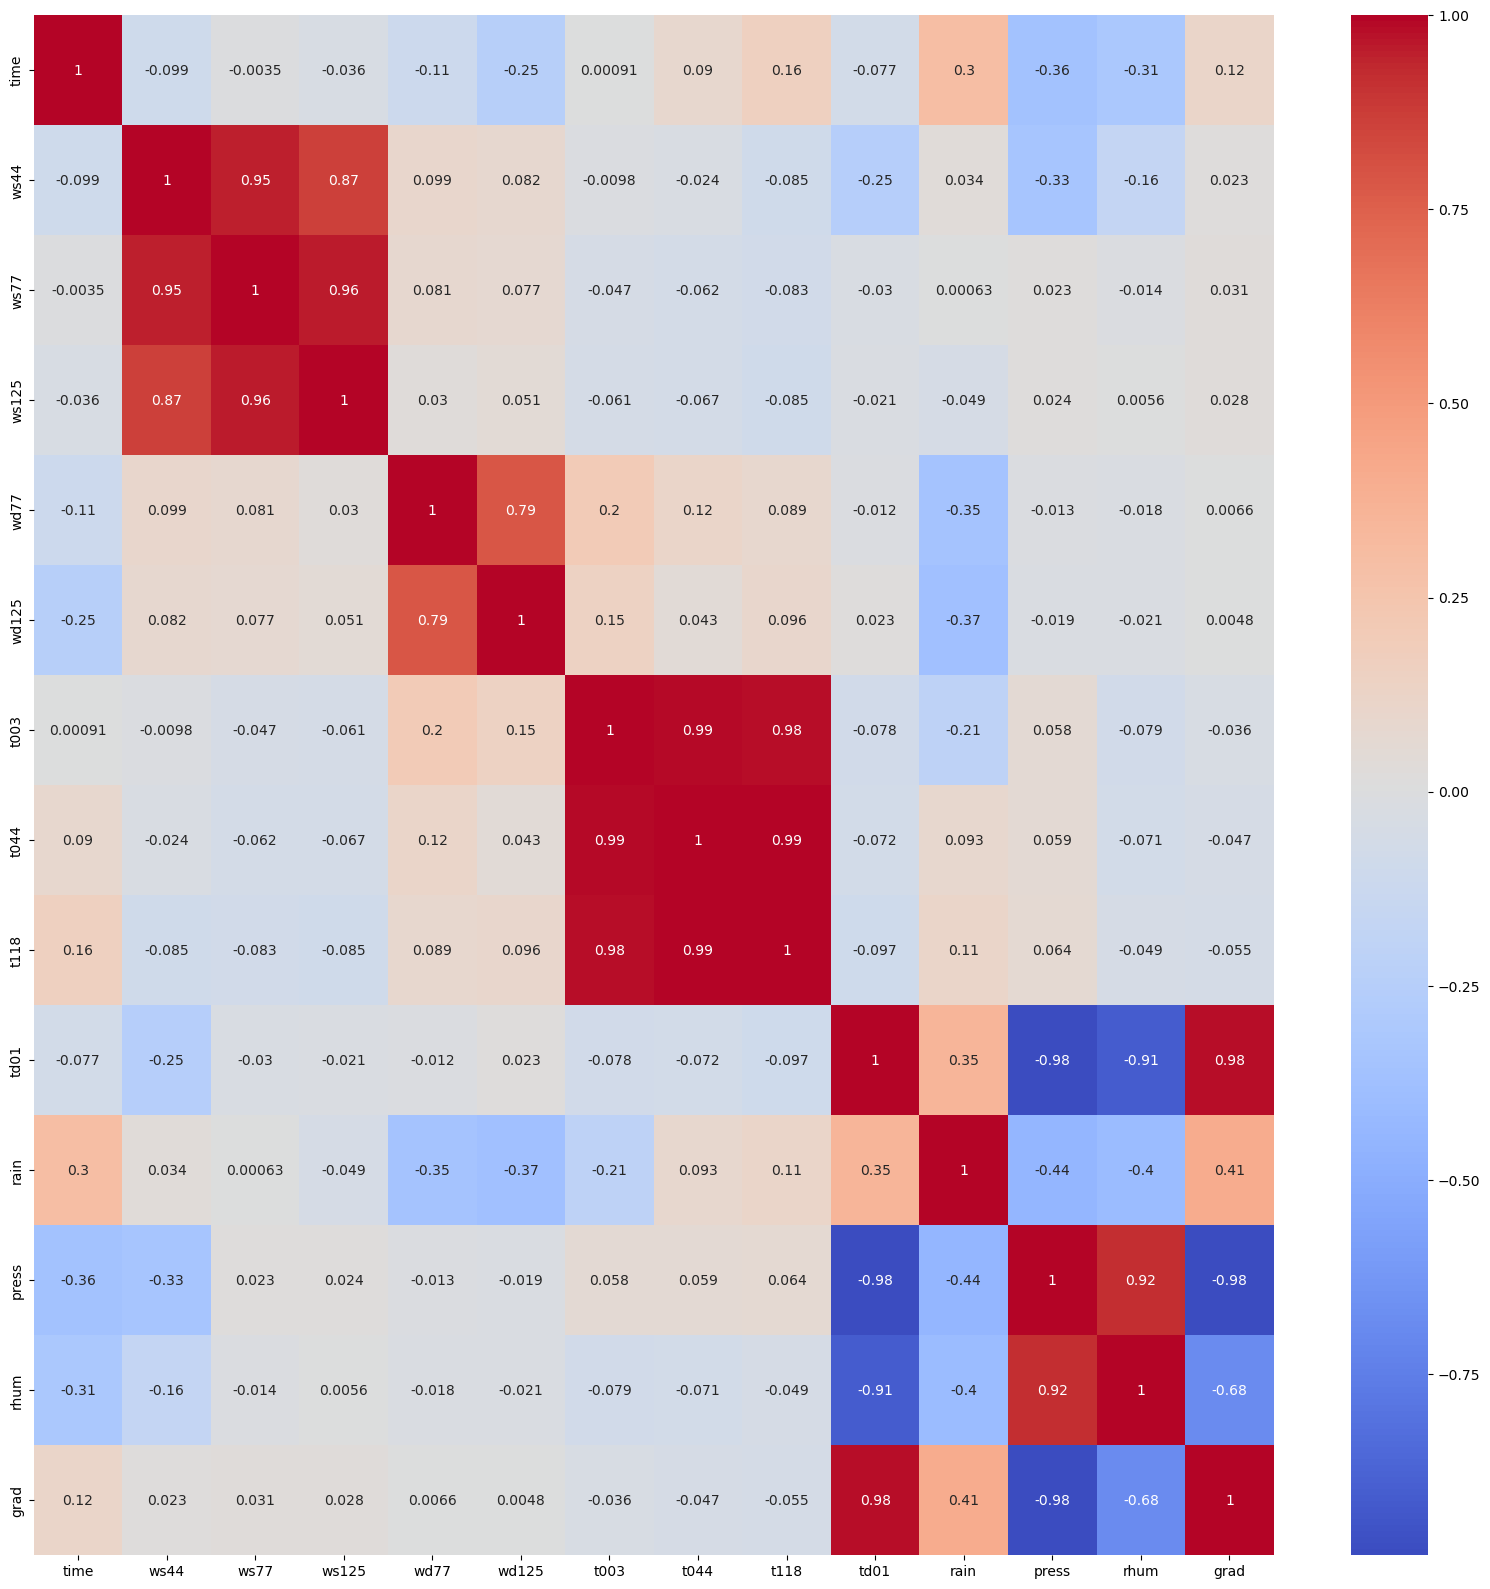

In [5]:
corr_matrix = df_mast.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() # pressure is highly correlated with humidity, grad and td01

Next, it's a good idea to observe the missing values in each column, to get a feel for our data coverage over time.

<Axes: >

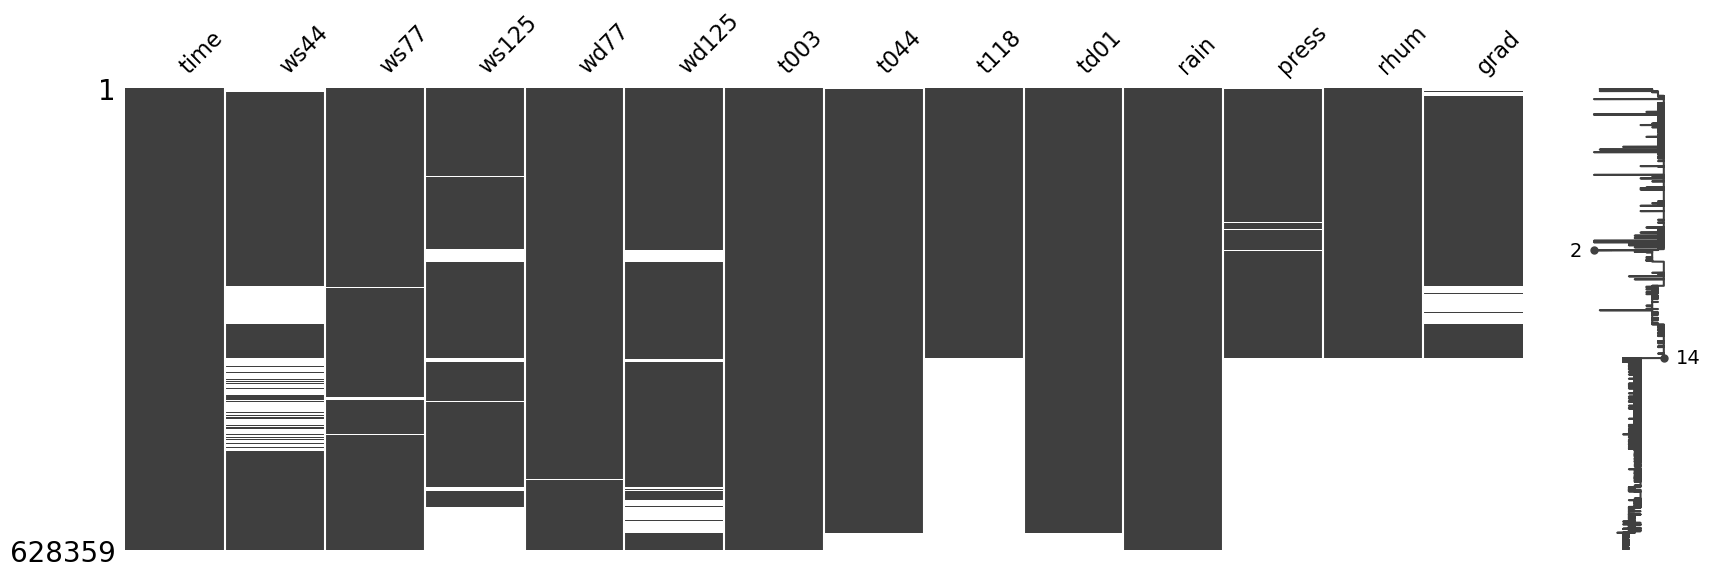

In [6]:
#visualising missing values using missigno
import missingno as msno
msno.matrix(df_mast, figsize = (20, 6)) 

Oh no, it looks like there are a LOT of missing values for the temperature, pressure, relative humidity and wind gradient.  However, it has been suggested that, for predicting the amount of energy to be obtained from the wind turbines, the only columns necessary are those referring to the Wind Speed and Wind Direction. For that reason, it might be smart to drop these columns since they don't bring much to the table for our working case.

In [7]:
df_mast = df_mast.drop(['t003','t044','t118','td01','rain','press','rhum','grad'], axis=1)
df_mast.head(3)

,time,ws44,ws77,ws125,wd77,wd125
0,1995-11-20 16:25:00,NaN,3.36,3.04,205.0,208.0
1,1995-11-20 16:35:00,NaN,3.05,3.17,205.0,214.0
2,1995-11-20 16:45:00,NaN,3.59,3.64,204.0,209.0


Now we have only the time and the wind speed & direction measurements.

How about we select an altitude to work with? It has been stated that, the higher the altitude, the higher the relevance of the wind data. However, it is also very important that all four seasons are properly covered by the data. For that reason, the two measurements that catch our eye the most are the ones for 77 meters (highest data coverage) and 125 meters (highest altitude, with a few missing patches of data).

It could be relevant to inspect what values are missing for the 125 meter measurements. If we observe that, despite the missing values, there is still considerable coverage for all seasons, we will opt with this altitude.

<Axes: xlabel='time'>

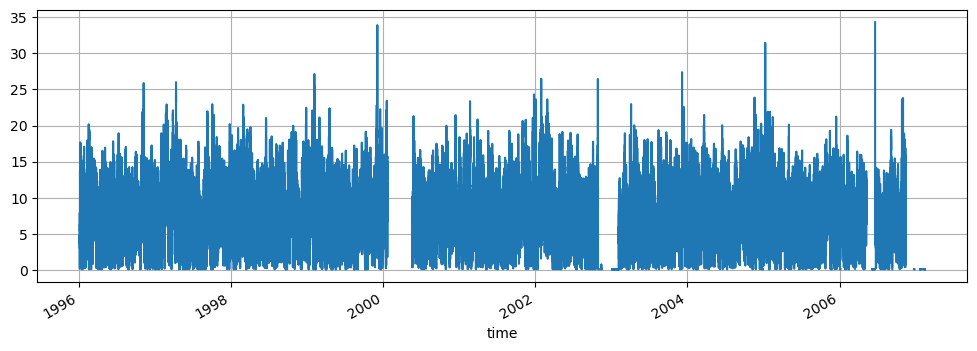

In [8]:
see_time = df_mast.copy()

see_time['time'] = pd.to_datetime(see_time['time'])

see_time.set_index('time', inplace=True)

see_time['1996-01-05':'2007-02-17']['ws125'].plot(figsize=(12,4), grid=True)


<Axes: xlabel='time'>

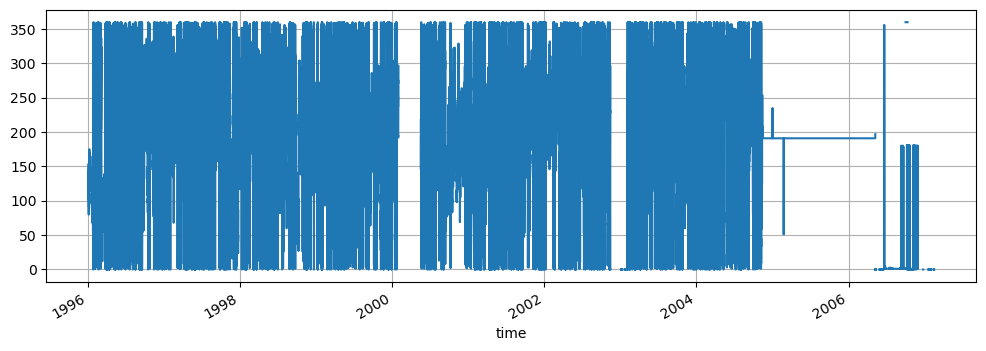

In [9]:
see_time['1996-01-05':'2007-02-17']['wd125'].plot(figsize=(12,4), grid=True)


Observations:

### WIND SPEED & DIRECTION:
- There is around a third of the year 2000 missing
- There is little bit missing between the end of 2002 and start of 2003.

### WIND SPEED:
- It turns out that our data does not span until the end of 2007, but rather only until the middle of 2006. The values after that seem to be outliers.

### WIND DIRECTION:
- The wind direction data has an even shorter timespan of until the end of 2004.

We can inspect each of these cases a little bit closer.

### Inspecting year 2000

<Axes: xlabel='time'>

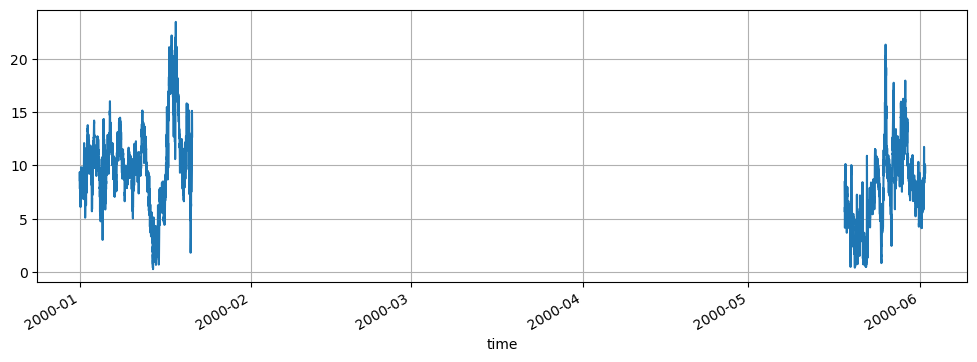

In [10]:
see_time['2000-01-01':'2000-06-01']['ws125'].plot(figsize=(12,4), grid=True)

It looks like we are missing data between late January and mid-May of 2000. This represents a hole in the data for Winter & Spring.

### Inspecting between year 2002 and 2003

<Axes: xlabel='time'>

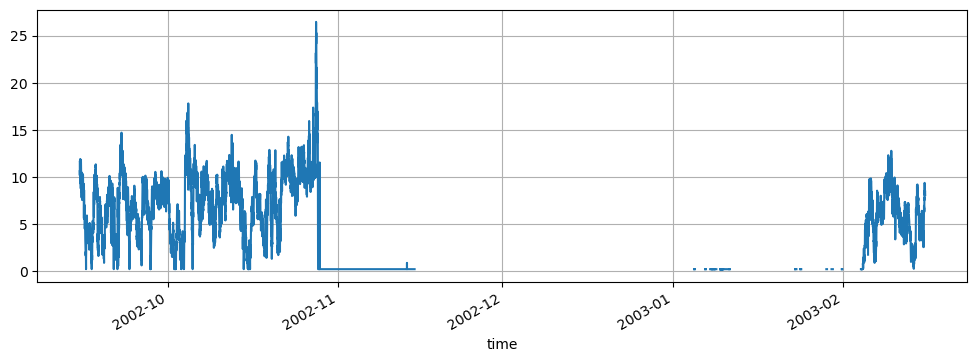

In [11]:
see_time['2002-09-15':'2003-02-15']['ws125'].plot(figsize=(12,4), grid=True)


Between the years of 2002 and 2003, we are missing the data between late November of 2002 and early February of 2003.

### Finding out until when does our WIND SPEED MAST data actually span

<Axes: xlabel='time'>

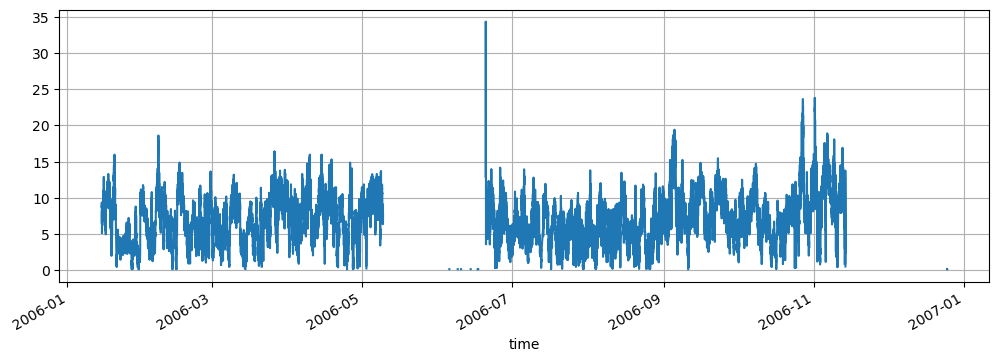

In [12]:
see_time['2006-01-15':'2007-01-01']['ws125'].plot(figsize=(12,4), grid=True)


<Axes: xlabel='time'>

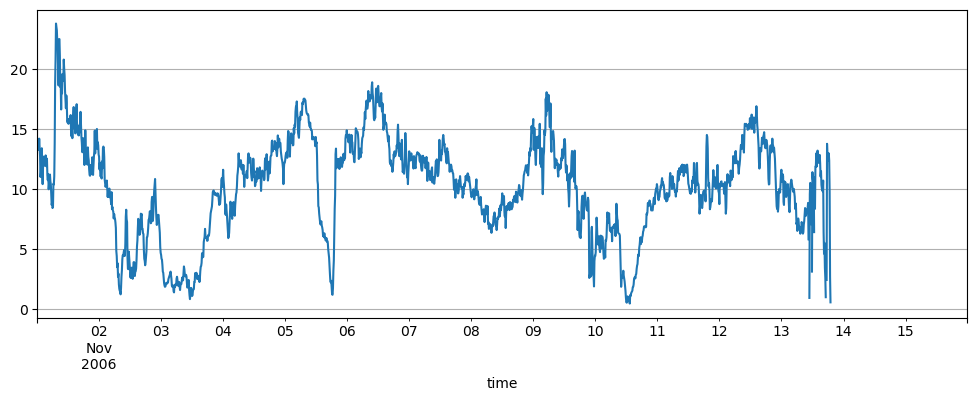

In [13]:
see_time['2006-11-01':'2006-11-15']['ws125'].plot(figsize=(12,4), grid=True)


For WIND SPEED, a significant chunk of May of 2006 is missing, and our last valid data point is the 13th of November of 2006.

### Next, finding out until when does our WIND DIRECTION MAST DATA span

<Axes: xlabel='time'>

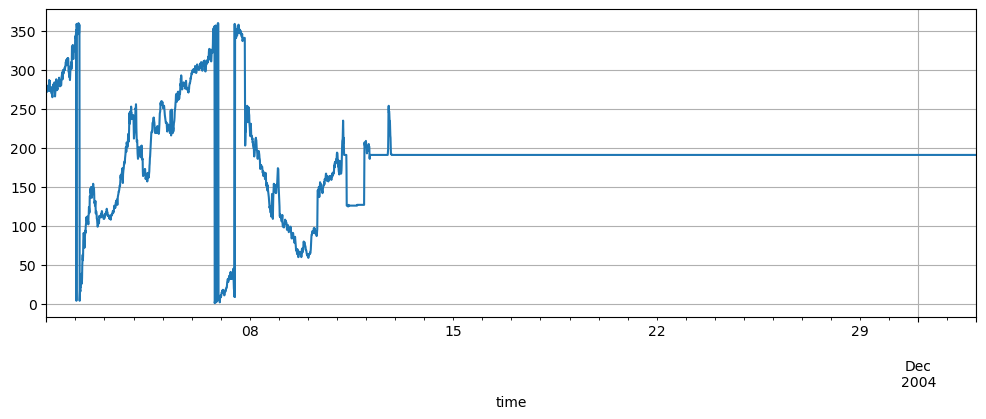

In [14]:
see_time['2004-11-01':'2004-12-02']['wd125'].plot(figsize=(12,4), grid=True)


Looks like the last valid data point for Wind Direction is the 13th of November of 2004.

Overall, these "data holes" amount to 4 + 3 + 1 = 8 months of the entire data collection, 5 from Winter and 3 from Spring. The timespan of the data, after inspection, is concluded to be between January of 1995 and November of 2004, which amounts to 118 months. That makes approximately 30 months of data per season in our dataset.

Considering the higher relevance of higher altitude data, we chose to stick with the altitude of 125 meters, given that 25 months of Winter, the most "neglected" season of our dataset, still seems like a good amount of data despite the missing values. (For example, splitting 25 into 70/30 for train/test will give 17 samples for testing and 8 for training, which still sounds substantial.)

We will now drop the other altitude measurements, and drop any rows that have missing values.

In [15]:
df_mast = df_mast.drop(['ws44','ws77','wd77'], axis=1)
df_mast.head()


,time,ws125,wd125
0,1995-11-20 16:25:00,3.04,208.0
1,1995-11-20 16:35:00,3.17,214.0
2,1995-11-20 16:45:00,3.64,209.0
3,1995-11-20 16:55:00,3.77,209.0
4,1995-11-20 17:05:00,4.28,212.0


In [16]:
#dropping rows with missing values
df_mast = df_mast.dropna()
df_mast.describe()

,time,ws125,wd125
count,531693,531693.000000,531693.000000
mean,2001-03-27 11:48:27.183167360,7.649747,194.912709
min,1995-11-20 16:25:00,0.000000,0.000000
25%,1998-06-08 16:45:00,5.110000,137.000000
50%,2001-04-15 04:35:00,7.530000,191.000000
75%,2004-01-15 03:30:00,9.950000,263.000000
max,2007-12-22 13:46:00,34.300000,360.000000
std,NaN,3.591482,87.940273


After describing our supposedly clean dataset, we see that the data still spans all the way to 2007 even though we observed that the last valid data point was in November of 2004. We will now manually cut off the data up until the point we saw was valid.

In [17]:
df_mast['time'] = pd.to_datetime(df_mast['time'])
df_mast = df_mast[df_mast['time'] <= '2004-11-14']
df_mast.describe()

,time,ws125,wd125
count,441540,441540.000000,441540.000000
mean,2000-04-24 15:48:18.840195328,7.694293,201.026487
min,1995-11-20 16:25:00,0.110000,0.000000
25%,1997-12-30 04:42:30,5.160000,129.000000
50%,2000-06-06 01:40:00,7.560000,215.000000
75%,2002-07-12 17:37:30,10.000000,273.000000
max,2004-11-13 23:52:00,33.890000,360.000000
std,NaN,3.601229,90.662302


At last, our dataset contains the Wind Speed & Direction between late November of 1995 and late November of 2004.

We must also convert the Mast data to UTC time since it came in DK time.

In [18]:
## Converting the MAST time from DK to UTC time
df_mast['time'] = df_mast['time'] - timedelta(hours=2)


For later inspection, we will also now add a column for the seasons.
For simplicity, the months chosen for each season were the following:
- Winter: December, January, February
- Spring: March, April, May
- Summer: June, July, August
- Autumun: September, October, November

In [19]:
#making season column based on TIMESTAMP month.
df_mast['season'] = df_mast['time'].dt.month
df_mast['season'] = df_mast['season'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[1,1,2,2,2,3,3,3,4,4,4,1])

In [20]:
df_mast.head(2)

,time,ws125,wd125,season
0,1995-11-20 14:25:00,3.04,208.0,4
1,1995-11-20 14:35:00,3.17,214.0,4


We now have a column saying what season each datapoint refers to. Great!

In [21]:
#Set the wind direction to 0 if 360 since 0 and 360 are the same thing
df_mast.loc[df_mast['wd125'] == 360, 'wd125'] = 0

In [22]:
#create columns for east and north based on cartesian coordinates for the wind speed and wind direction
df_mast_cartesian = df_mast.copy()

df_mast_cartesian['east'] = df_mast_cartesian['ws125'] * np.sin((df_mast_cartesian['wd125']/360) * 2*np.pi)
df_mast_cartesian['north'] = df_mast_cartesian['ws125'] * np.cos((df_mast_cartesian['wd125']/360) * 2*np.pi)

df_mast_cartesian.head(11)

df_mast_cartesian.describe()

,time,ws125,wd125,season,east,north
count,441540,441540.000000,441540.000000,441540.000000,441540.000000,441540.000000
mean,2000-04-24 13:48:18.840195456,7.694293,200.579687,2.556160,-1.436445,-1.410740
min,1995-11-20 14:25:00,0.110000,0.000000,1.000000,-33.869355,-25.162809
25%,1997-12-30 02:42:30,5.160000,129.000000,2.000000,-6.240319,-5.136942
50%,2000-06-05 23:40:00,7.560000,214.000000,3.000000,-1.688970,-1.436769
75%,2002-07-12 15:37:30,10.000000,273.000000,4.000000,3.286227,2.093843
max,2004-11-13 21:52:00,33.890000,359.000000,4.000000,19.681588,27.239955
std,NaN,3.601229,90.764766,1.107124,6.479135,5.112570


## MESO part

In [23]:
df_meso = pd.read_csv('meso_Risoe.csv')

In [24]:
#convert the timestamp to a PD DateTime for easier manipulation
df_meso['TIMESTAMP'] = pd.to_datetime(df_meso['TIMESTAMP'])
df_meso.dtypes

TIMESTAMP    datetime64[ns]
HGT                 float64
RHO060              float64
RHO080              float64
RHO100              float64
                  ...      
RH140               float64
RH160               float64
RH180               float64
RH200               float64
RH220               float64
Length: 74, dtype: object

Check that there is no duplicate data for the same time.

In [25]:
# find if there are duplicates in date
df_meso['TIMESTAMP'].duplicated().drop_duplicates()

0    False
Name: TIMESTAMP, dtype: bool

Good, there were no duplicates. Let's look at the columns that we have from the Meso dataset and decide what to keep, according to the manipulation we've already done in our Mast dataset.

In [26]:
df_meso.columns

Index(['TIMESTAMP', 'HGT', 'RHO060', 'RHO080', 'RHO100', 'RHO120', 'RHO140',
       'RHO160', 'RHO180', 'RHO200', 'RHO220', 'TC060', 'TC080', 'TC100',
       'TC120', 'TC140', 'TC160', 'TC180', 'TC200', 'TC220', 'WSP060',
       'WSP080', 'WSP100', 'WSP120', 'WSP140', 'WSP160', 'WSP180', 'WSP200',
       'WSP220', 'WDIR060', 'WDIR080', 'WDIR100', 'WDIR120', 'WDIR140',
       'WDIR160', 'WDIR180', 'WDIR200', 'WDIR220', 'PRS060', 'PRS080',
       'PRS100', 'PRS120', 'PRS140', 'PRS160', 'PRS180', 'PRS200', 'PRS220',
       'TK060', 'TK080', 'TK100', 'TK120', 'TK140', 'TK160', 'TK180', 'TK200',
       'TK220', 'TKE_PBL060', 'TKE_PBL080', 'TKE_PBL100', 'TKE_PBL120',
       'TKE_PBL140', 'TKE_PBL160', 'TKE_PBL180', 'TKE_PBL200', 'TKE_PBL220',
       'RH060', 'RH080', 'RH100', 'RH120', 'RH140', 'RH160', 'RH180', 'RH200',
       'RH220'],
      dtype='object')

In [27]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
df_meso.describe()

,TIMESTAMP,HGT,RHO060,RHO080,RHO100,RHO120,RHO140,RHO160,RHO180,RHO200,RHO220,TC060,TC080,TC100,TC120,TC140,TC160,TC180,TC200,TC220,WSP060,WSP080,WSP100,WSP120,WSP140,WSP160,WSP180,WSP200,WSP220,WDIR060,WDIR080,WDIR100,WDIR120,WDIR140,WDIR160,WDIR180,WDIR200,WDIR220,PRS060,PRS080,PRS100,PRS120,PRS140,PRS160,PRS180,PRS200,PRS220,TK060,TK080,TK100,TK120,TK140,TK160,TK180,TK200,TK220,TKE_PBL060,TKE_PBL080,TKE_PBL100,TKE_PBL120,TKE_PBL140,TKE_PBL160,TKE_PBL180,TKE_PBL200,TKE_PBL220,RH060,RH080,RH100,RH120,RH140,RH160,RH180,RH200,RH220
count,204288,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.00000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.00000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000,204288.000000
mean,2011-08-31 10:35:38.345864448,7.770889,1.245402,1.242797,1.240214,1.237649,1.235110,1.232588,1.230072,1.227565,1.225057,8.338244,8.255919,8.169709,8.080471,7.986722,7.889820,7.792388,7.694081,7.596379,6.389825,6.951803,7.418863,7.812332,8.148081,8.440046,8.700832,8.922643,9.134629,202.028200,202.551547,202.916097,203.372662,203.805051,204.374172,204.975849,205.55740,206.060986,100578.635300,100339.013795,100099.903254,99861.188506,99623.042707,99385.323366,99148.067948,98911.393871,98674.917263,281.498233,281.41567,281.329658,281.240476,281.146191,281.049790,280.952547,280.854112,280.756397,0.745943,0.705669,0.673752,0.645659,0.619536,0.597840,0.574229,0.554048,0.534048,82.860632,82.926707,82.982745,83.031566,83.077128,83.120648,83.151466,83.171380,83.182156
min,2000-01-01 07:00:00,7.770000,1.148368,1.146861,1.145318,1.143669,1.142012,1.140304,1.138595,1.136462,1.133429,-11.812188,-11.202571,-11.352413,-11.487389,-11.542497,-11.528465,-11.589276,-11.782728,-11.972642,0.020000,0.030000,0.040000,0.060000,0.040000,0.010000,0.010000,0.030000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,95552.880000,95327.340000,95102.240000,94877.540000,94653.220000,94429.230000,94205.690000,93982.830000,93760.090000,261.350000,261.96000,261.810000,261.670000,261.620000,261.630000,261.570000,261.380000,261.190000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,19.020000,16.500000,14.400000,14.360000,15.610000,15.860000,12.550000,11.510000,9.730000
25%,2005-10-31 06:45:00,7.770000,1.220224,1.217655,1.215123,1.212613,1.210178,1.207773,1.205375,1.203002,1.200600,3.214178,3.137997,3.054172,2.970547,2.877338,2.785394,2.688028,2.590940,2.490348,4.330000,4.750000,5.070000,5.310000,5.490000,5.630000,5.760000,5.840000,5.920000,133.830000,133.810000,133.770000,133.820000,133.990000,134.277500,134.680000,135.10000,135.487500,99933.960000,99696.350000,99459.137500,99222.472500,98986.077500,98750.442500,98514.487500,98279.417500,98044.590000,276.370000,276.30000,276.210000,276.130000,276.040000,275.950000,275.850000,275.750000,275.650000,0.240000,0.220000,0.200000,0.200000,0.170000,0.140000,0.120000,0.110000,0.100000,74.300000,74.040000,73.760000,73.520000,73.340000,73.200000,73.070000,72.940000,72.830000
50%,2011-08-31 06:30:00,7.770000,1.242082,1.239484,1.236875,1.234296,1.231764,1.229251,1.226751,1.224246,1.221771,8.151083,8.084521,8.009

That's a lot of columns. The meso data has a lot more information than we got from the Mast.
Let's just have a quick breakdown of the information before dropping the columns:
- Different altitudes: 60, 80. 100, 120, 140, 160, 180, 200, 220 meters.
- Different information for each altitude:
    - HGT: ??? (Strange value around 7.77 with very little variation)
    - RH: Relative Humidity
    - RHO: Air Density
    - TC: Temperature in Celsius
    - TK: Temperature in Kelvin
    - WSP: Wind Speed
    - WDIR: Wind Direction
    - PRS: Atmospheric Pressure
    - TKE_PBL: Turbulent Kinetic Energy within the Planetary Bound Layer

It's always interesting to look at the correlation of the features, but this time we have over 30 columns so our correlation matrix would be gigantic. For this reason, let's look only at the altitude closest to 125 meters (which we analyzed in Mast data), and see the correlation among the features.

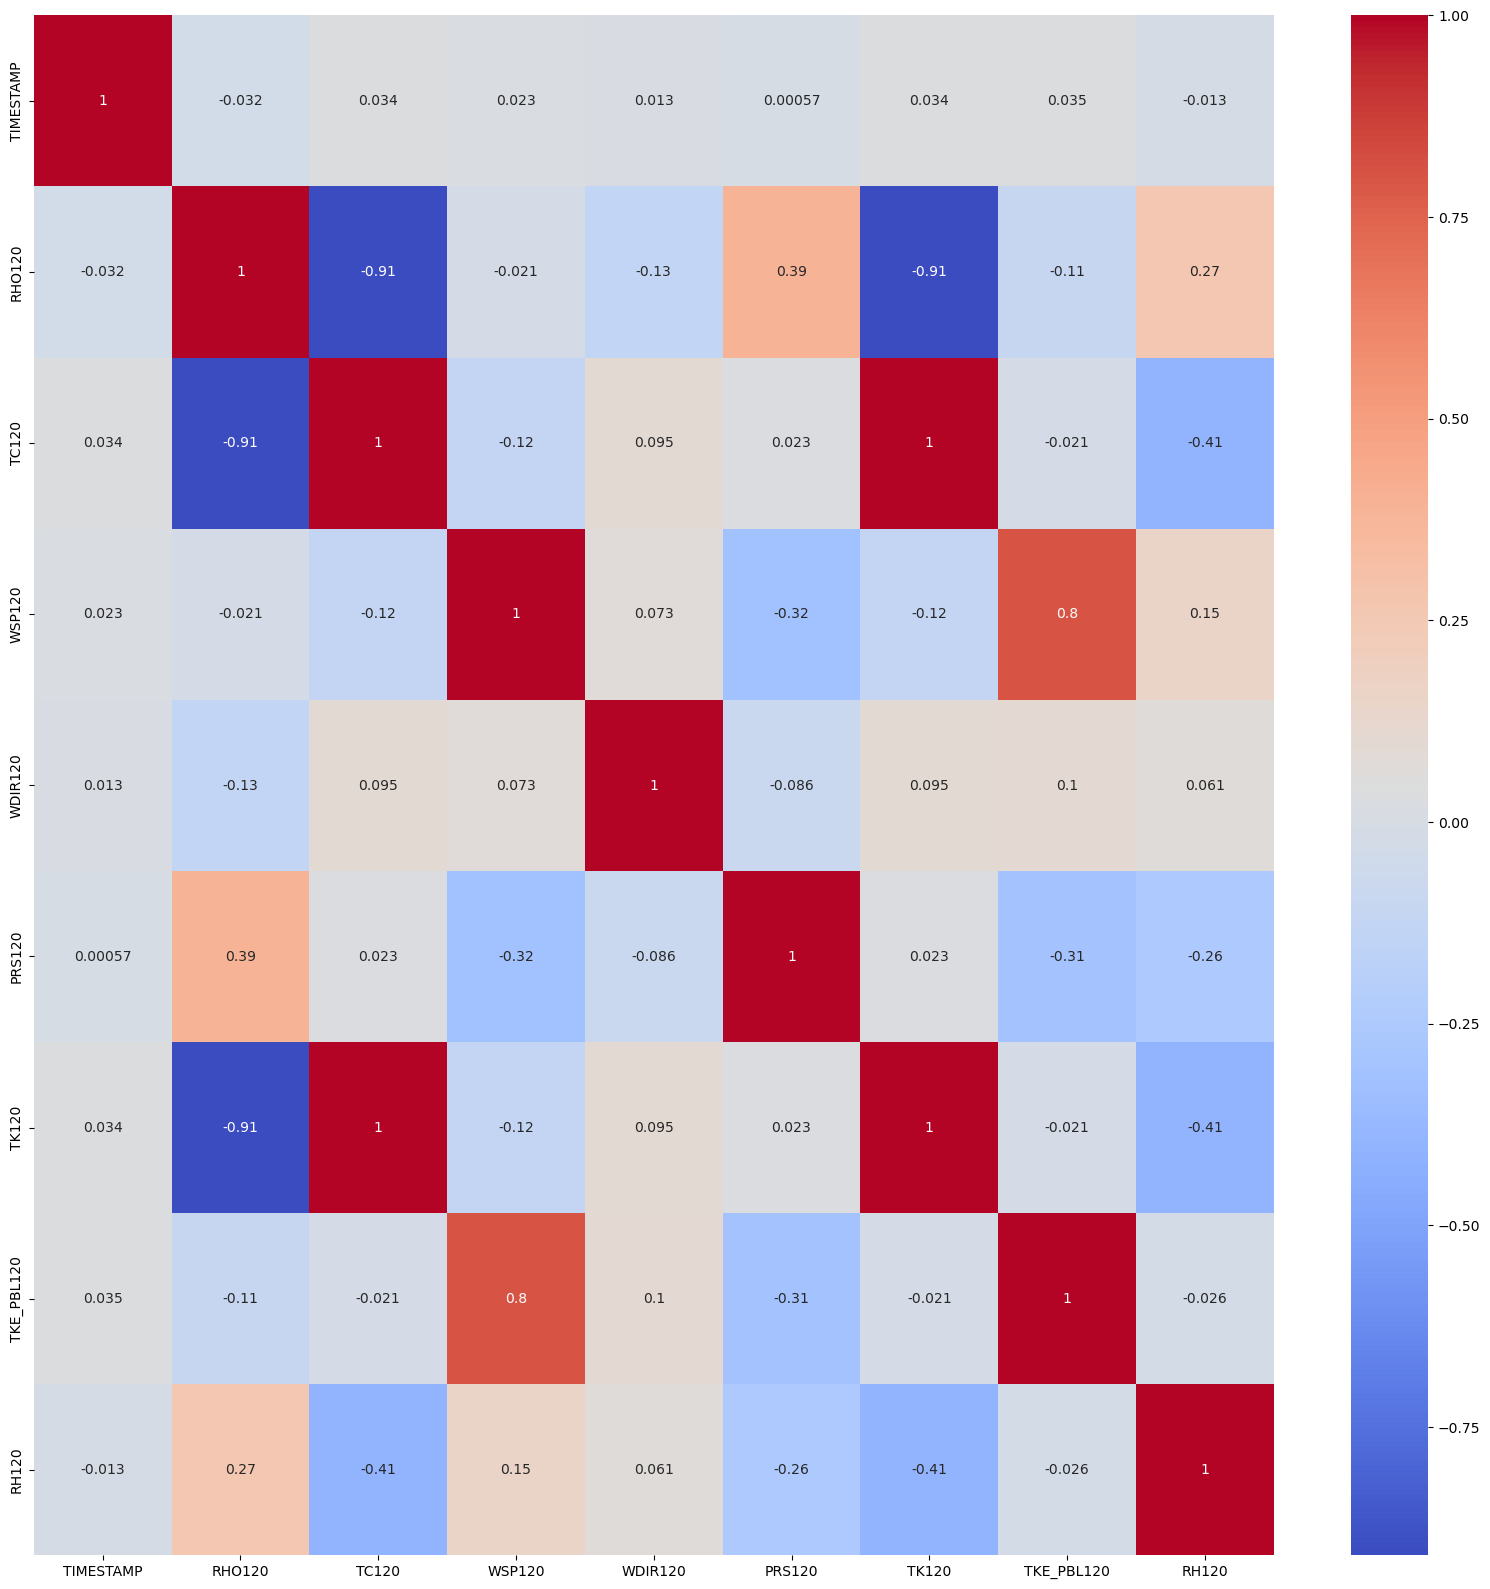

In [28]:
#keeping only the column that with the closest altitute to the mast one (125m)
df_meso = df_meso[['TIMESTAMP', 'RHO120', 'TC120', 'WSP120', "WDIR120", 'PRS120',
                    'TK120', 'TKE_PBL120', 'RH120']]


mes_corr = df_meso.corr()
plt.figure(figsize=(20,20))
sns.heatmap(mes_corr, annot=True, cmap='coolwarm')
plt.show()

Beautiful.
Notable correlations among features are:
- TC and TK have a perfect correlation because they are two different units for the same measurement, Celsius and Kelvin.
- The air density (RHO) is highly related to the temperature (TC/TK). As temperature increases, air density tends to decrease.
- The wind speed is highly correlated with the Turbulent Kinetic Energy! This is because high wind speeds generate turbulence in the atmosphere.

But even after these observations, we still don't need anything other than the wind speed and direction, so let's keep just that.

In [29]:
df_meso_cleaned = df_meso[['TIMESTAMP','WSP120','WDIR120']]
df_meso_cleaned

,TIMESTAMP,WSP120,WDIR120
0,2001-06-10 15:00:00,1.88,99.34
1,2001-06-10 16:00:00,0.48,166.00
2,2001-06-10 17:00:00,0.93,310.79
3,2001-06-10 18:00:00,1.67,357.42
4,2001-06-10 19:00:00,5.98,24.14
...,...,...,...
204283,2020-09-24 08:00:00,10.36,216.21
204284,2020-09-24 09:00:00,10.67,215.43
204285,2020-09-24 10:00:00,9.43,230.43
204286,2020-09-24 11:00:00,9.38,233.10


And that's all the preprocessing for the MESO part in isolation!

### Now, to join the MAST and MESO datasets.

The first thing that catches our eye when trying to overlap these datasets is that the data in MAST is way more frequent than in MESO.

The MAST data has a data point every 10 minutes.
The MESO data has a data point every 1 hour (60 minutes).


In this situation where the "data frequency" is different, there are two possible approaches:

- Interpolate the least frequent (MESO) data to have more data points (e.g. in this case, make 6 intermediary data points between every hourly data point).
- Average out the data points of the most frequent data (MAST) to match the frequency of the other dataset.

Given that a hourly frequency seems good enough, we will go with the second approach not to drastically increase the size of our data set (because if we were to interpolate the entirety of the MESO dataset, our dataset would increase by 6 times in size). So, we will average out the datapoints in MAST for every hour.

One aspect where this could be tricky is with the angles. What if, in the same hour, we would have a 1 degree and a 359 degree angle? Although they are almost the same, their average would become 180. This is where the East & North components of the wind direction we calculated come in handy, because we can then average each of those out and get a new value in degrees that corresponds to the average wind direction of six data point (every 10 minutes in one hour).

In [30]:
#Splitting the timestamp into separate columns and also grouping the mast data into groups of 1 hour
# taking the avg north and east speed for mast and combining them into polar coordinates

df_mast_cartesian.rename(columns={'time': 'TIMESTAMP'}, inplace=True)

df_mast_cartesian['year'] = df_mast_cartesian['TIMESTAMP'].dt.year
df_mast_cartesian['month'] = df_mast_cartesian['TIMESTAMP'].dt.month
df_mast_cartesian['day'] = df_mast_cartesian['TIMESTAMP'].dt.day
df_mast_cartesian['hour'] = df_mast_cartesian['TIMESTAMP'].dt.hour
mast_hourly_average = df_mast_cartesian.groupby(['year', 'month', 'day', 'hour'])['north'].mean().reset_index()
hourly_average_east = df_mast_cartesian.groupby(['year', 'month', 'day', 'hour'])['east'].mean().reset_index()

mast_hourly_average['east'] = hourly_average_east['east']
mast_hourly_average['ws125'] = np.sqrt(mast_hourly_average['east']**2 + mast_hourly_average['north']**2)
mast_hourly_average['wd125'] = (np.arctan2(mast_hourly_average['east'], mast_hourly_average['north'])/(2*np.pi)) * 360 % 360

# After doing all the transformations, let's look once more at our "describe" output to see if everything is still okay.

mast_hourly_average.describe()

,year,month,day,hour,north,east,ws125,wd125
count,73633.000000,73633.000000,73633.000000,73633.000000,73633.000000,73633.000000,73633.000000,73633.000000
mean,1999.804096,6.628387,15.707522,11.502601,-1.409947,-1.436364,7.664340,201.119711
std,2.641542,3.380034,8.807176,6.921545,5.081926,6.450811,3.570317,90.667007
min,1995.000000,1.000000,1.000000,0.000000,-22.657385,-32.724551,0.008884,0.000000
25%,1997.000000,4.000000,8.000000,6.000000,-5.125658,-6.240232,5.169100,129.671833
50%,2000.000000,7.000000,16.000000,12.000000,-1.428933,-1.693139,7.537512,214.809899
75%,2002.000000,10.000000,23.000000,18.000000,2.080344,3.267252,9.947930,273.459805
max,2004.000000,12.000000,31.000000,23.000000,25.359886,18.815096,32.724884,359.998142


Looks good! Just like before, the wind speed values range from 0 to around 33 m/s and the wind direction also ranges from [0,360[.

We will now strip the averaged MAST data into the relevant columns like we had before.

In [31]:
# Putting the timestamp column back into the dataset

def time_convert(year,month,day,hour):
    timestamp = datetime(int(year),int(month),int(day),int(hour),0,0)
    return pd.to_datetime(timestamp)
    
for index, row in mast_hourly_average.iterrows():
    time_stamp = time_convert(row['year'],row['month'],row['day'],row['hour'])
    mast_hourly_average.at[index, 'TIMESTAMP'] = time_stamp

In [32]:
# Dropping the timestamp subsets and adding the season column like before
mast_hourly_average_calculated = mast_hourly_average.drop(['year','month','day','hour'], axis=1)

mast_hourly_average_calculated['season'] = ((mast_hourly_average_calculated['TIMESTAMP'].dt.month + 1) // 4) + 1

mast_hourly_average_calculated.rename(columns={'north': 'mast_north', 'east': 'mast_east'}, inplace=True)

mast_hourly_average_calculated.describe()

,mast_north,mast_east,ws125,wd125,TIMESTAMP,season
count,73633.000000,73633.000000,73633.000000,73633.000000,73633,73633.000000
mean,-1.409947,-1.436364,7.664340,201.119711,2000-04-24 14:54:42.989963776,2.532289
min,-22.657385,-32.724551,0.008884,0.000000,1995-11-20 14:00:00,1.000000
25%,-5.125658,-6.240232,5.169100,129.671833,1997-12-30 02:00:00,2.000000
50%,-1.428933,-1.693139,7.537512,214.809899,2000-06-06 00:00:00,3.000000
75%,2.080344,3.267252,9.947930,273.459805,2002-07-13 00:00:00,3.000000
max,25.359886,18.815096,32.724884,359.998142,2004-11-13 21:00:00,4.000000
std,5.081926,6.450811,3.570317,90.667007,NaN,0.933478


In [33]:
# Breaking the MESO wind direction information into north & east components as well

df_meso_cartesian = df_meso_cleaned.copy()

df_meso_cartesian['meso_east'] = df_meso_cartesian['WSP120'] * np.sin((df_meso_cartesian['WDIR120']/360) * 2*np.pi)
df_meso_cartesian['meso_north'] = df_meso_cartesian['WSP120'] * np.cos((df_meso_cartesian['WDIR120']/360) * 2*np.pi)

df_meso_cartesian.head(11)

df_meso_cartesian.describe()

,TIMESTAMP,WSP120,WDIR120,meso_east,meso_north
count,204288,204288.000000,204288.000000,204288.000000,204288.000000
mean,2011-08-31 10:35:38.345864448,7.812332,203.372662,-1.851028,-1.448350
min,2000-01-01 07:00:00,0.060000,0.000000,-26.218628,-21.323525
25%,2005-10-31 06:45:00,5.310000,133.820000,-6.671288,-5.331970
50%,2011-08-31 06:30:00,7.690000,219.540000,-2.413987,-1.301693
75%,2017-06-28 06:15:00,10.060000,275.030000,2.971054,2.297266
max,2023-06-11 06:00:00,29.000000,360.000000,19.860224,20.141164
std,NaN,3.475854,89.803853,6.376604,5.189341


And now that our MESO and MAST data points have the same frequency, we can join them by their timestamp!!

In [34]:
#join mast and meso data based on timestamp
df_result = mast_hourly_average_calculated.join(df_meso_cartesian.set_index('TIMESTAMP'), on='TIMESTAMP', validate='1:1', rsuffix= 'x', lsuffix='y')
df_result_cleaned = df_result.dropna()
df_result_cleaned.describe()

,mast_north,mast_east,ws125,wd125,TIMESTAMP,season,WSP120,WDIR120,meso_east,meso_north
count,37746.000000,37746.000000,37746.000000,37746.000000,37746,37746.000000,37746.000000,37746.000000,37746.000000,37746.000000
mean,-1.447708,-1.492365,7.548369,202.526731,2002-07-26 00:04:13.218884096,2.515922,7.588561,202.609310,-1.621648,-1.453981
min,-19.861422,-25.550516,0.017917,0.000000,2000-01-01 07:00:00,1.000000,0.060000,0.000000,-22.583759,-20.204092
25%,-5.202331,-6.251161,5.111488,133.857781,2001-05-26 11:15:00,2.000000,5.200000,132.262500,-6.361875,-5.262400
50%,-1.363324,-1.698557,7.432814,216.200906,2002-06-23 15:30:00,3.000000,7.390000,217.730000,-2.059611,-1.382790
75%,2.014409,3.050606,9.779750,274.878418,2003-10-10 23:45:00,3.000000,9.770000,274.747500,3.073058,2.160753
max,25.359886,18.144531,25.649184,359.988893,2004-11-13 21:00:00,4.000000,22.880000,360.000000,19.860224,18.441747
std,5.050025,6.296496,3.534453,90.272074,NaN,0.894619,3.360759,90.322245,6.184219,5.088613


In [35]:
# Cleaning the data further, assuming that ws125=0.15 and wd125=0 is an error, remove all records with these value combinations
resultv1 = (df_result_cleaned.loc[(df_result_cleaned['ws125'] != 0.15) | (df_result_cleaned['wd125'] != 0)])

resultv1.describe()

,mast_north,mast_east,ws125,wd125,TIMESTAMP,season,WSP120,WDIR120,meso_east,meso_north
count,37694.000000,37694.000000,37694.000000,37694.000000,37694,37694.000000,37694.000000,37694.000000,37694.000000,37694.000000
mean,-1.449912,-1.494424,7.558575,202.806123,2002-07-25 19:40:29.001963264,2.515387,7.590604,202.623459,-1.624031,-1.451945
min,-19.861422,-25.550516,0.017917,0.004636,2000-01-01 07:00:00,1.000000,0.060000,0.000000,-22.583759,-20.204092
25%,-5.205117,-6.257003,5.120519,134.136379,2001-05-25 22:15:00,2.000000,5.200000,132.252500,-6.369332,-5.257070
50%,-1.370988,-1.709287,7.439159,216.426306,2002-06-22 13:30:00,3.000000,7.400000,217.850000,-2.062265,-1.379373
75%,2.018401,3.060675,9.782299,274.979868,2003-10-11 12:45:00,3.000000,9.770000,274.750000,3.073241,2.162165
max,25.359886,18.144531,25.649184,359.988893,2004-11-13 21:00:00,4.000000,22.880000,360.000000,19.860224,18.441747
std,5.053158,6.300593,3.526184,90.020140,NaN,0.893510,3.361414,90.321909,6.186625,5.088991


After having joined our data, we will now plot all the "matching" features across MESO & MAST over an arbitrary period of time to see how closely they overlap.

In [36]:
visualize = resultv1.copy()

visualize.set_index('TIMESTAMP', inplace=True)

start_time = '2004-01-01 00:00:00'
end_time = '2004-06-02 00:00:00'

# Slice the DataFrame based on the time range
subset_data = visualize[start_time:end_time]

### Wind speed Mast vs Meso

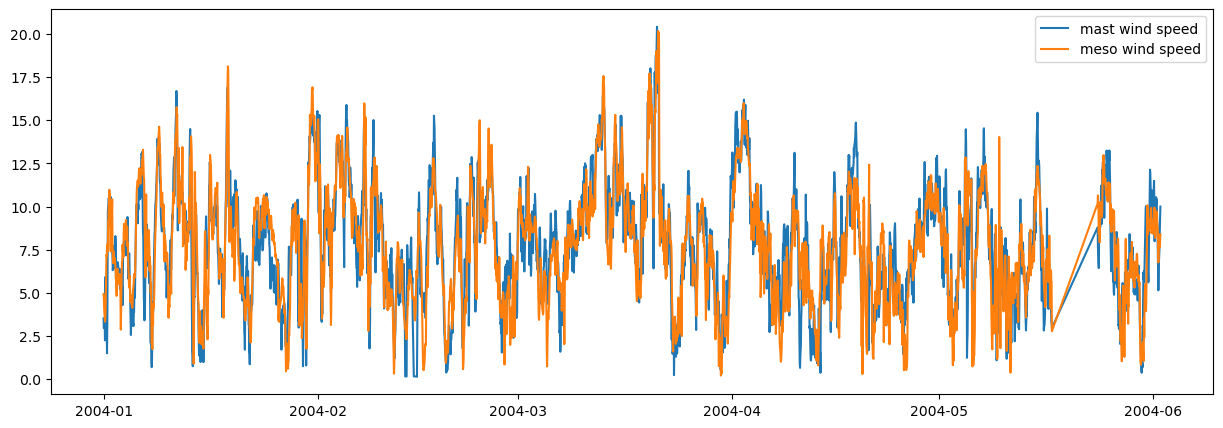

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(subset_data['ws125'], label='mast wind speed')
plt.plot(subset_data['WSP120'], label='meso wind speed')
plt.legend()
plt.show()

### Wind Direction Mast vs Meso

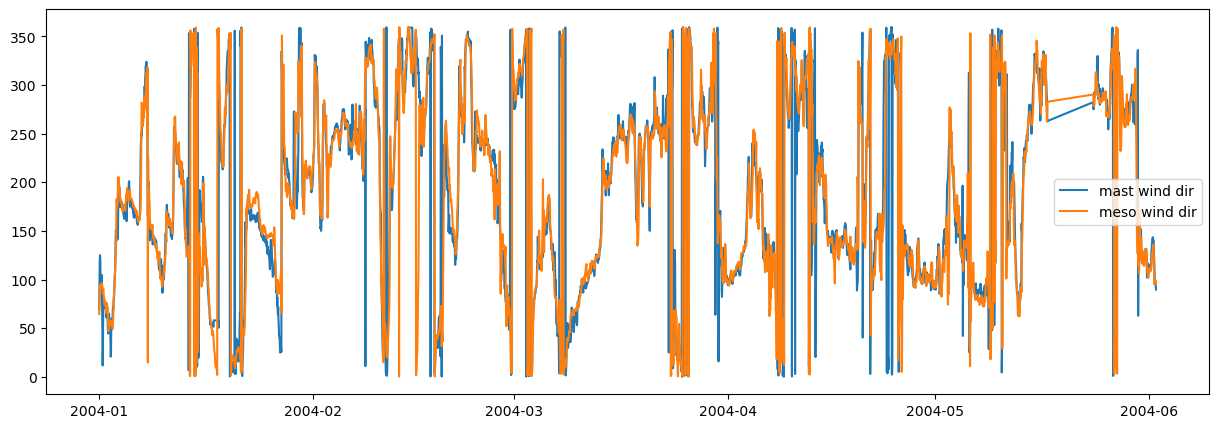

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(subset_data['wd125'], label='mast wind dir')
plt.plot(subset_data['WDIR120'], label='meso wind dir')
plt.legend()
plt.show()

### !!!!!!!

**OBSERVATION**: The wind direction seems to be totally off when the angles near the 0/360 cut off. For that reason, it could make a lot of sense to also look at the North & East components of the wind direction to see if they overlap closely. If they do, then the data is good and Meso & Mast wind measurements are similar - if they are not close, then Mast & Meso measured significantly different wind directions, which might interfere with the model's capacity of making predictions.

### North Component Mast vs Meso

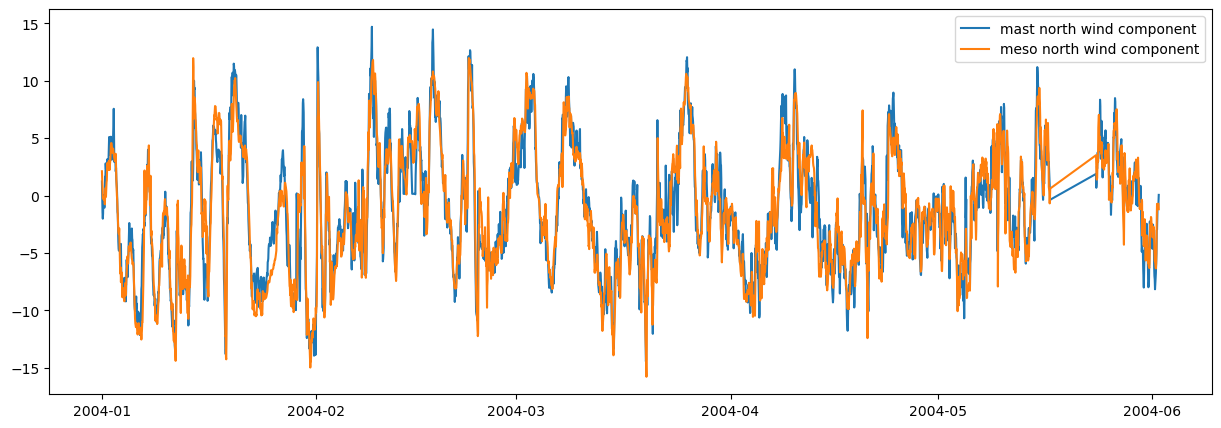

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(subset_data['mast_north'], label='mast north wind component')
plt.plot(subset_data['meso_north'], label='meso north wind component')
plt.legend()
plt.show()

### East Component Mast vs Meso

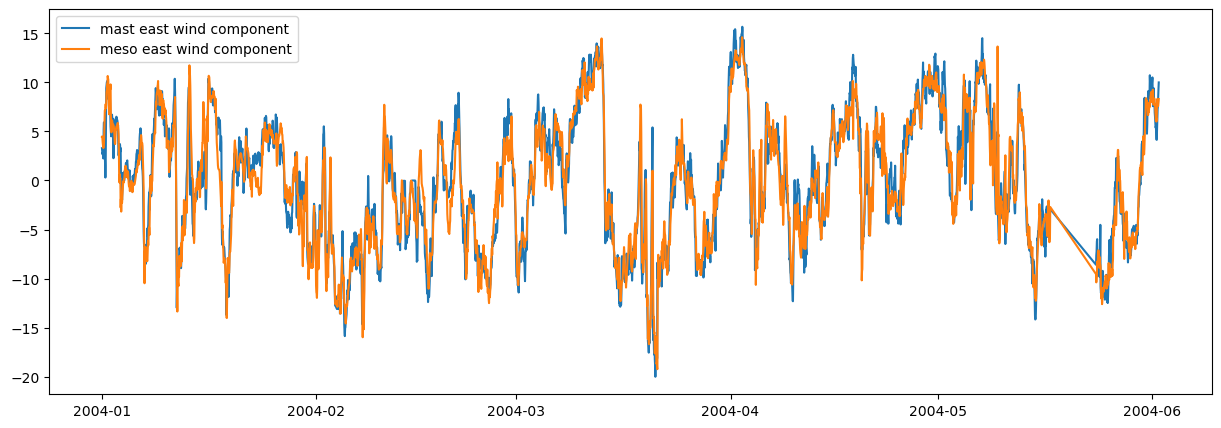

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(subset_data['mast_east'], label='mast east wind component')
plt.plot(subset_data['meso_east'], label='meso east wind component')
plt.legend()
plt.show()

Great, both the North & East components of the wind direction in Mast & Meso follow each other's counterpart closely!! Having this information at our disposable might make the model's predictive capacity more accurate.

After having joined the data, we just want to look at the final data's correlation table to see if everything is as we expect. We would expect a strong positive correlation between all "matching" features (wind speed across mast & meso, and the north & east components as well).

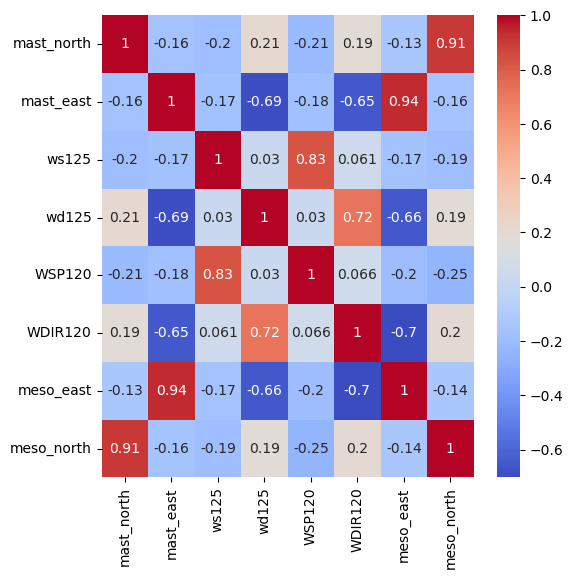

In [41]:
#drop the timestamp and checking the correlation of the data
see_corr_result = resultv1.drop(columns=['TIMESTAMP', 'season'])

result_corr = see_corr_result.corr()

plt.figure(figsize=(6,6))
sns.heatmap(result_corr , annot=True, cmap='coolwarm')
plt.show()

As expected, the following pairs of features have a very strong positive correlation:
- Mast wind speed & Meso wind speed
- Mast wind direction & Meso wind direction
- Mast wind east component & Meso wind east component
- Mast wind north component & Meso wind north component

We can also see that there is a moderately high negative correlation between the Wind East Component and the Wind Direction. When one goes down, the other goes up. This could be because:

- An angle of zero degrees has NO East Component.
- An angle of 90 degrees has its East Component at MAXIMUM.
- An angle of 180 degrees has NO East Component.
- An angle of 270 degrees has the East Component at its possible LOWEST (going into NEGATIVE values).
- An angle of 360 degrees has NO East Component.

Looking at this breakdown, we can see that the general tendency is that, the higher the angle in degrees, the lower the East Component. This could explain the strong negative correlation between these two features.

However, this is not relevant to our issue at hand.

Another way of "revising" our data will be to compare the Wind Speed measurements to Weibell curves, since wind speed usually describes a curve shaped like that.

array([[<Axes: title={'center': 'ws125'}>,
        <Axes: title={'center': 'WSP120'}>]], dtype=object)

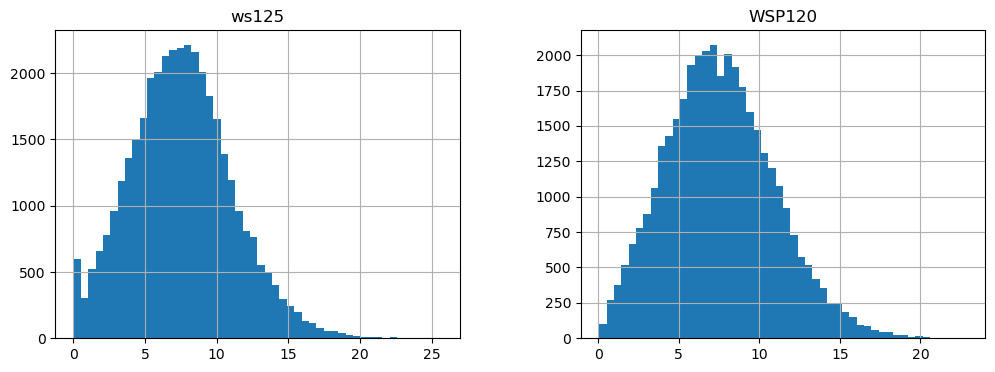

In [42]:
speeds_only = see_corr_result[['ws125', 'WSP120']]

speeds_only.hist(bins=50, figsize=(12,4))

They look good! However, we see that there is far too high of a frequency of 0 wind speed measurements, so let's remove some outliers.

array([[<Axes: title={'center': 'ws125'}>,
        <Axes: title={'center': 'WSP120'}>]], dtype=object)

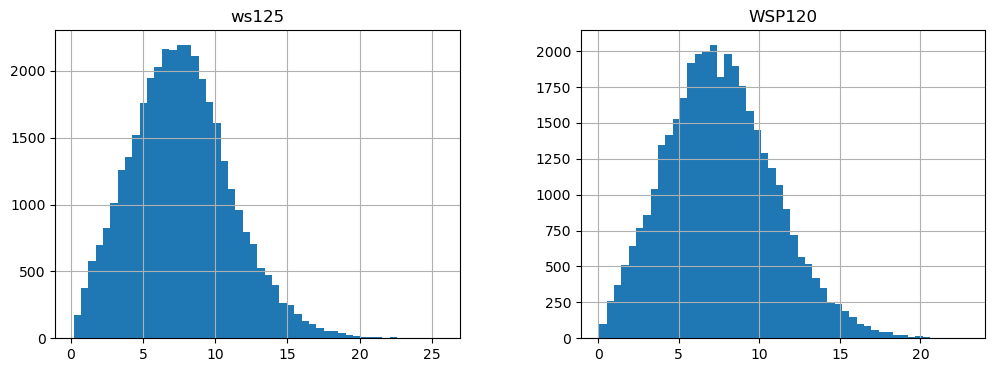

In [43]:
resultv1 = resultv1[resultv1['ws125'] >= 0.2]

speeds_only = resultv1[['ws125', 'WSP120']]

speeds_only.hist(bins=50, figsize=(12,4))

Great, our wind speed measurements follow a Weibell Curve distribution, so our transformations didn't disform the data distribution!

We are now ready to train our model to be able to infer location-specific Mast data from long-term collected Meso data over many more years.

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd

model_data = resultv1.copy()
data_by_timestamp = model_data.sort_values(by="TIMESTAMP")

train_sets = []
val_sets = []
test_sets = []

for season in [1,2,3,4]:
    season_data = data_by_timestamp[data_by_timestamp['season'] == season]

    _train, remaining = train_test_split(season_data, test_size=0.4, shuffle=False)
    _val, _test = train_test_split(remaining, test_size=0.5, shuffle=False)

    train_sets.append(_train)
    val_sets.append(_val)
    test_sets.append(_test)


train = pd.concat(train_sets)
val = pd.concat(val_sets)
test = pd.concat(test_sets)

print("Training set seasons:", train['season'].unique())
print("Validation set seasons:", val['season'].unique())
print("Test set seasons:", test['season'].unique())


columns_labels = ['mast_north', 'mast_east', 'ws125', 'wd125']

train_labels = train[columns_labels]
test_labels = test[columns_labels]
val_labels = val[columns_labels]
#timestamp is also not needed, for now
columns_labels.append('TIMESTAMP')
train=train.drop(columns=columns_labels)
val=val.drop(columns=columns_labels)
test=test.drop(columns=columns_labels)




Training set seasons: [1 2 3 4]
Validation set seasons: [1 2 3 4]
Test set seasons: [1 2 3 4]


In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, MultiTaskLassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

alphas = 10**np.linspace(10,-2,100)*0.5

lassocv = MultiTaskLassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(train, train_labels)
lassocv.alpha_



1.328043891473342

In [46]:

lasso = Lasso(alpha = lassocv.alpha_, max_iter = 100000)
lasso.fit(train, train_labels)
print("r^2 on train data is {}".format(lasso.score(train, train_labels)))
print("r^2 on validation data is {}".format(lasso.score(val, val_labels)))

r^2 on train data is 0.7606708188065351
r^2 on validation data is 0.7200906360828234


In [47]:
print("Intercept: {}".format(lasso.intercept_))


Intercept: [ -0.32092572   0.49254796   1.81639523 101.03399066]


Let's try to play with that alpha and see if we can introduce some bias so that the model can generalize better. The difference between R^2 is around 0.04. Let's see if we can make that smaller. 

In [48]:
for alpha in [0.01, 0.5, 1, 5, 100]:
    lassoTest = Lasso(alpha = alpha, max_iter = 100000)
    lassoTest.fit(train, train_labels)
    print(f"\nAlpha={alpha}")
    print("r^2 on train data is {}".format(lassoTest.score(train, train_labels)))
    print("r^2 on validation data is {}".format(lassoTest.score(val, val_labels)))


Alpha=0.01
r^2 on train data is 0.7657421059559741
r^2 on validation data is 0.7245214510546493

Alpha=0.5
r^2 on train data is 0.7648046184174659
r^2 on validation data is 0.7241391831273973

Alpha=1
r^2 on train data is 0.7627163243698403
r^2 on validation data is 0.7221280146456942

Alpha=5
r^2 on train data is 0.7015061947846061
r^2 on validation data is 0.6607345699433771

Alpha=100
r^2 on train data is 0.23882522292530126
r^2 on validation data is 0.2040852202382648


As you can see the alpha that was predicted gives pretty good result without under or overfitting. We could maybe use even smaller alpha but we are going to stay with the initial one. Let's see how it performs on the test data. 

In [49]:
print("r^2 on test data is {}".format(lasso.score(test, test_labels)))


r^2 on test data is 0.7401912987931989


That's a decent performance.

Now let's look at other metrics such as MSE or SSE. Let's compare those with other models. After a discussion, we believe that the errors might be so high as we didn't scale the data. So let's do that. This can be seen at the bottom of this notebook.

In [50]:
from sklearn.metrics import mean_squared_error

predictions = lasso.predict(val)

sse = np.sum((val_labels - predictions) ** 2)
mse = mean_squared_error(val_labels, predictions)

print("SSE:", sse)
print("MSE:", mse)

# the number are weird cuz they are not scaled

SSE: mast_north    3.419606e+04
mast_east     3.664907e+04
ws125         2.647448e+04
wd125         3.293313e+07
dtype: float64
MSE: 1109.8941538872434


In [51]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(train, train_labels)
ridgecv.alpha_

2488.511782166057

In [52]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(train, train_labels)
print("r^2 on train data is {}".format(ridge.score(train, train_labels)))
print("r^2 on validation data is {}".format(ridge.score(val, val_labels)))
print("r^2 on test data is {}".format(ridge.score(test, test_labels)))

predictions = ridge.predict(val)
sse = np.sum((val_labels - predictions) ** 2)
mse = mean_squared_error(val_labels, predictions)

print("SSE:", sse)
print("MSE:", mse)

r^2 on train data is 0.7657166716771004
r^2 on validation data is 0.7243900675721975
r^2 on test data is 0.743516258754187
SSE: mast_north    3.349209e+04
mast_east     3.582856e+04
ws125         2.561437e+04
wd125         3.291368e+07
dtype: float64
MSE: 1109.1604312474649


The Ridge model is doing slightly better as it has better r^2 and smaller errors. The difference are not big but visible.

In [53]:
ols = LinearRegression()
ols.fit(train, train_labels)

print("r^2 on train data is {}".format(ols.score(train, train_labels)))
print("r^2 on validation data is {}".format(ols.score(val, val_labels)))
print("r^2 on test data is {}".format(ols.score(test, test_labels)))

predictions = ols.predict(val)
sse = np.sum((val_labels - predictions) ** 2)
mse = mean_squared_error(val_labels, predictions)

print("SSE:", sse)
print("MSE:", mse)

r^2 on train data is 0.7657477500775769
r^2 on validation data is 0.7244354716901236
r^2 on test data is 0.743493627062058
SSE: mast_north    3.346154e+04
mast_east     3.580289e+04
ws125         2.563412e+04
wd125         3.290326e+07
dtype: float64
MSE: 1108.8092052726774


The Ordinary least squares regression is doing a similar job as the other models so the metrics are pretty close to the other two.

To show how the models are performing I could plot the predictions against the labels. 

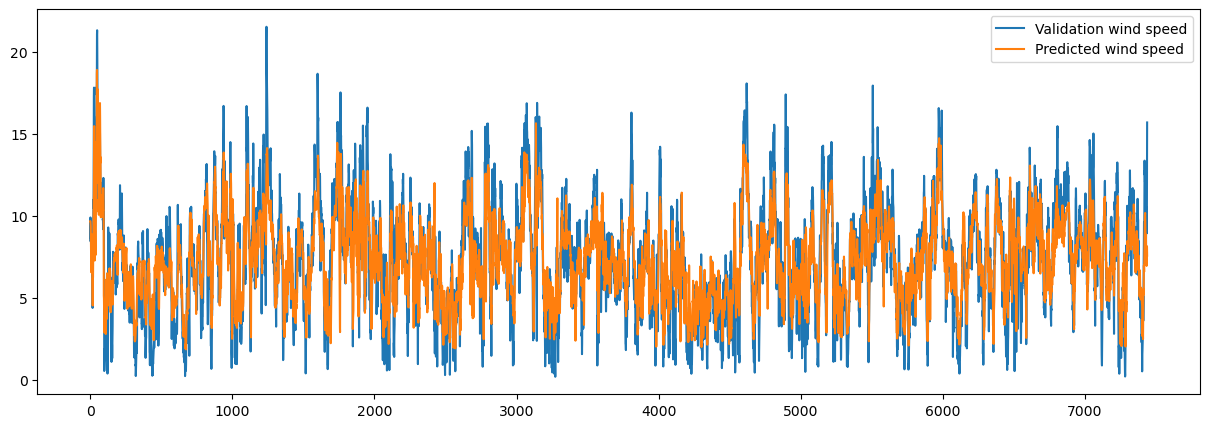

In [54]:
import matplotlib.pyplot as plt

predictions = lasso.predict(val)
predictions_df = pd.DataFrame(predictions)
val_plot_labels = pd.DataFrame.reset_index(val_labels)

plt.figure(figsize=(15, 5))
plt.plot(val_plot_labels['ws125'], label='Validation wind speed')
plt.plot(predictions_df[2], label='Predicted wind speed')
plt.legend()
plt.show()

The model predicts the general trend pretty well, however it has some problem with predicting very high or low wind speed. On the other hand, that makes sense as those conditions could be seen as a deviation from the norm. If the model was to predict those correctly, it would probably be overfitting. Let's take a closer look at 200 predictions.

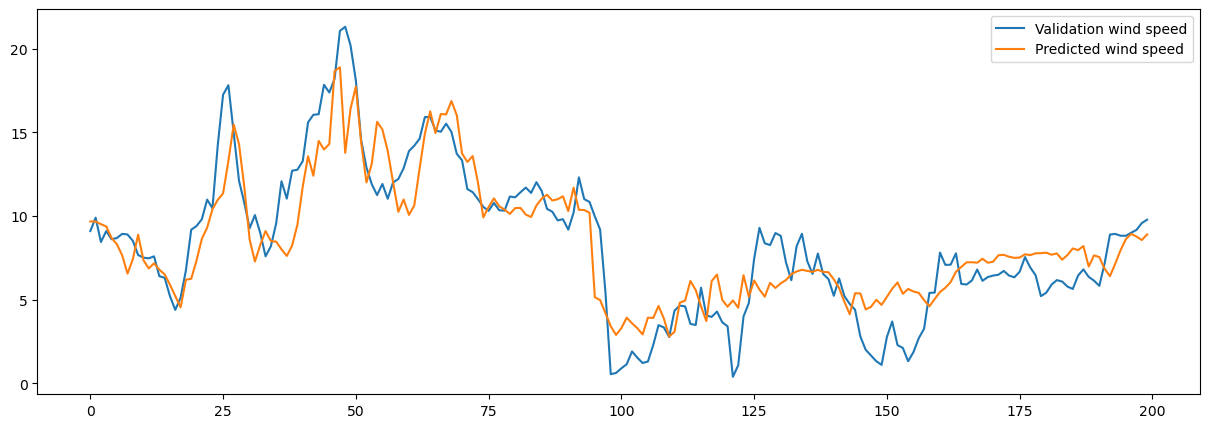

In [59]:
labels_100 = val_plot_labels.head(200)['ws125']
predictions_100 = predictions_df.head(200)[2]

plt.figure(figsize=(15, 5))
plt.plot(labels_100, label='Validation wind speed')
plt.plot(predictions_100, label='Predicted wind speed')
plt.legend()
plt.show()


Wow that's pretty close. The predictions are correctly following the trend and it can be clearly visible on the graph.

In [78]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd

model_data_for_scaling = resultv1.copy().drop(columns='TIMESTAMP')
model_data_scaled = pd.DataFrame(RobustScaler().fit_transform(X=model_data_for_scaling), columns=model_data_for_scaling.columns)
train_sets = []
val_sets = []
test_sets = []

for season in model_data_scaled['season'].unique():
    season_data = model_data_scaled[model_data_scaled['season'] == season]

    _train, remaining = train_test_split(season_data, test_size=0.4, shuffle=False)
    _val, _test = train_test_split(remaining, test_size=0.5, shuffle=False)

    train_sets.append(_train)
    val_sets.append(_val)
    test_sets.append(_test)


train = pd.concat(train_sets)
val = pd.concat(val_sets)
test = pd.concat(test_sets)

# print("Training set seasons:", train['season'].unique())
# print("Validation set seasons:", val['season'].unique())
# print("Test set seasons:", test['season'].unique())


columns_labels = ['mast_north', 'mast_east', 'ws125', 'wd125']

train_labels = train[columns_labels]
test_labels = test[columns_labels]
val_labels = val[columns_labels]
train=train.drop(columns=columns_labels)
val=val.drop(columns=columns_labels)
test=test.drop(columns=columns_labels)


,mast_north,mast_east,ws125,wd125
0,-0.803577,-0.014062,0.022699,-0.153121
1,-0.824483,-0.107718,0.113461,-0.111597
2,-0.879260,-0.085797,0.180332,-0.128047
3,-0.798785,-0.113253,0.079504,-0.105601
4,-0.857119,-0.109534,0.163332,-0.114994
...,...,...,...,...
14541,-0.441200,-0.571713,0.244263,0.146100
14542,-0.581570,-0.410388,0.126742,0.060151
14543,-0.722455,-0.238955,0.085707,-0.037619
14544,-0.670716,0.022560,-0.200574,-0.158289


In [79]:
alphas = 10**np.linspace(10,-2,100)*0.5

lassocv = MultiTaskLassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(train, train_labels)
lassocv.alpha_

lasso = Lasso(alpha = lassocv.alpha_, max_iter = 100000)
lasso.fit(train, train_labels)
print("r^2 on train data is {}".format(lasso.score(train, train_labels)))
print("r^2 on validation data is {}".format(lasso.score(val, val_labels)))

from sklearn.metrics import mean_squared_error

predictions = lasso.predict(val)

sse = np.sum((val_labels - predictions) ** 2)
mse = mean_squared_error(val_labels, predictions)

print("SSE:", sse)
print("MSE:", mse)

r^2 on train data is 0.7654354520217543
r^2 on validation data is 0.7244785033735169
SSE: mast_north     625.133354
mast_east      400.773443
ws125         1206.434271
wd125         1664.706817
dtype: float64
MSE: 0.1309491897085931


Now the errors look better. As internet tells me the MSE closer to 0 is a good result. However, scaling the data, didn't affect the performance of the model.

That's it for the assignment. We have learned a lot about wind and wind mills, but we also gained knowledge about various regression models and their metrics, thank you. ;D